In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
import seaborn as sns
sns.set_style('whitegrid')

# Pi calculation

In [29]:
def change_types(df):
    res_df = df.copy()
    res_df['args'] = res_df['args'].apply(lambda x: x[1:-2].strip()).astype(int)
    return res_df

In [33]:
one_proc = change_types(pd.read_csv('exp_one_proc', quotechar="'"))
parallel = change_types(pd.read_csv('exp_parallel', quotechar="'"))
numpy_one_proc = change_types(pd.read_csv('exp_numpy', quotechar="'"))
numpy_parallel = change_types(pd.read_csv('exp_numpy_parallel', quotechar="'"))
dummy_parallel = change_types(pd.read_csv('exp_dummy_parallel', quotechar="'"))

In [43]:
total_df = pd.DataFrame()
total_df['args']=one_proc['args']
total_df['one_proc'] = one_proc['func_time']
total_df['parallel'] = parallel['func_time']
total_df['numpy_one_proc'] = numpy_one_proc['func_time']
total_df['numpy_parallel'] = numpy_parallel['func_time']
total_df['dummy_parallel'] = dummy_parallel['func_time']

In [44]:
total_df

args  one_proc  parallel  numpy_one_proc  numpy_parallel  \
0      1000    0.0016    0.0758          0.0316          0.0255   
1     10000    0.0223    0.0282          0.0013          0.0221   
2    100000    0.2302    0.0976          0.0289          0.0256   
3   1000000    0.7318    0.3258          0.0297          0.0213   
4  10000000    5.9684    2.0866          0.3311          0.2099   
5  50000000   30.5444   12.6236          1.6083          1.0263   

   dummy_parallel  
0          0.0093  
1          0.0263  
2          0.2128  
3          0.7098  
4          6.7960  
5         37.0058

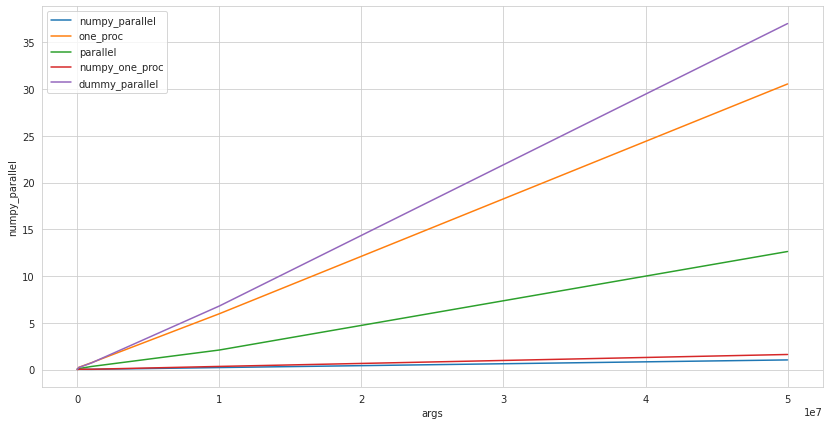

In [65]:
cols_for_graph = ['numpy_parallel', 'one_proc', 'parallel', 'numpy_one_proc', 'dummy_parallel',]
plt.figure(figsize=(14,7))
for col in cols_for_graph:
    sns.lineplot(total_df['args'], total_df[col], label=col)

Как мы видим, лучший результат дал распределенный нампай, хотя он недалеко ушел от однопроцессорной версии.
А параллельное вычисление числа пи значительно быстрее однопроцессорной версии.